# <center> Classify items in the fashion MNIST Dataset using a CNN  </center> <br> 

### This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images. 


Data: https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data

In [1]:
import pandas as pd
import numpy as np
import keras
import matplotlib.pyplot as plt

from keras.datasets import fashion_mnist
from keras import Sequential
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras import regularizers

from livelossplot import PlotLossesKeras

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
assert X_train.shape == (60000, 28, 28)
assert X_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

# Visualize data shape

In [3]:
print("Train-set data shape = ", X_train.shape)
print("Train-set labels shape = ", y_train.shape)

print("Test-set data shape = ", X_test.shape)
print("Test-set data shape = ", y_test.shape)

print("Show Classes = ", np.unique(y_test))
print("Show Nr. of classes = ", len(np.unique(y_test)))

Train-set data shape =  (60000, 28, 28)
Train-set labels shape =  (60000,)
Test-set data shape =  (10000, 28, 28)
Test-set data shape =  (10000,)
Show Classes =  [0 1 2 3 4 5 6 7 8 9]
Show Nr. of classes =  10


# Reshape the data. Images are 28x28 and 1 Channel (gray scale)

In [4]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

# Normalize the data between 0 and 1 (colors are coded from 0 to 255 so just divide by 255)

In [5]:
X_train = X_train/255
X_test = X_test/255

# Display a random training sample from each class

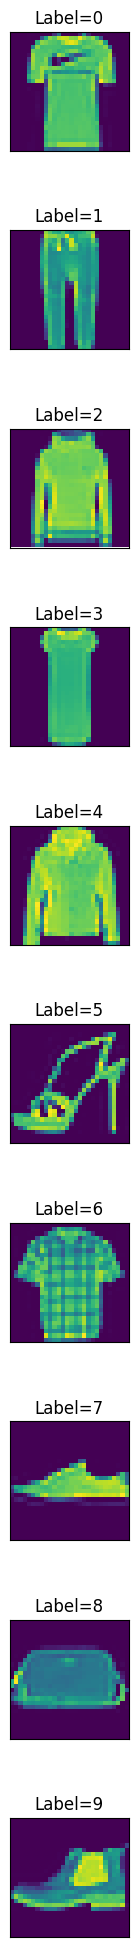

In [6]:
classes_ids = np.unique(y_train)
nr_classes = len(classes_ids)
f, axes = plt.subplots(len(classes_ids),1, figsize=(2, nr_classes*2))
f.tight_layout()

for cidx, class_id in enumerate(classes_ids):
    class_samples_idxs = np.argwhere(y_train == class_id).ravel()
    range_sel = np.random.randint(0, len(class_samples_idxs)-1, 1, dtype=int).ravel()
    image_idx = class_samples_idxs[range_sel[0]]
    
    class_label = y_train[image_idx]
    image_obj = X_train[image_idx]

    ax=axes[cidx]
    ax.imshow(image_obj)
    ax.set_title(f"Label={class_label}")
    ax.set_xticks([])
    ax.set_yticks([])


### Define the CNN Architecture

In [7]:
model = Sequential()

# Convolutional Layer
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), 
            activation='relu',
            kernel_initializer='uniform', 
            kernel_regularizer=regularizers.L2(1e-3), 
            bias_regularizer=regularizers.L2(1e-3), 
            activity_regularizer=regularizers.L2(1e-3)))
model.add(BatchNormalization())
model.add(Dropout(rate=0.20))
# Max Pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Layer
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 3), activation='relu',
            kernel_initializer='uniform', 
            kernel_regularizer=regularizers.L2(1e-3), 
            bias_regularizer=regularizers.L2(1e-3), 
            activity_regularizer=regularizers.L2(1e-3)))
model.add(BatchNormalization())
model.add(Dropout(rate=0.20))

# Convolutional Layer
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 3), activation='relu',
            kernel_initializer='uniform', 
            kernel_regularizer=regularizers.L2(1e-3), 
            bias_regularizer=regularizers.L2(1e-3), 
            activity_regularizer=regularizers.L2(1e-3)))
model.add(BatchNormalization())
model.add(Dropout(rate=0.20))

model.add(MaxPooling2D(pool_size=(2, 2)))

#add flattening layer
model.add(Flatten())

# Full connection
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dropout(0.2))

# Hidden layer
model.add(Dense(units=128, 
                activation='relu', 
                kernel_initializer='uniform', 
                kernel_regularizer=regularizers.L2(1e-3), 
                bias_regularizer=regularizers.L2(1e-3), 
                activity_regularizer=regularizers.L2(1e-3)))
model.add(BatchNormalization())
model.add(Dropout(0.20))

# Hidden layer
model.add(Dense(units=128, 
                activation='relu', 
                kernel_initializer='uniform', 
                kernel_regularizer=regularizers.L2(1e-3), 
                bias_regularizer=regularizers.L2(1e-3), 
                activity_regularizer=regularizers.L2(1e-3)))
model.add(BatchNormalization())
model.add(Dropout(0.20))

# Output layer
model.add(Dense(units=nr_classes, activation='softmax'))

# Compile CNN

In [8]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 batch_normalization (Batch  (None, 26, 26, 64)        256       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 batch_normalization_1 (Bat  (None, 11, 11, 64)        

# Train the CNN

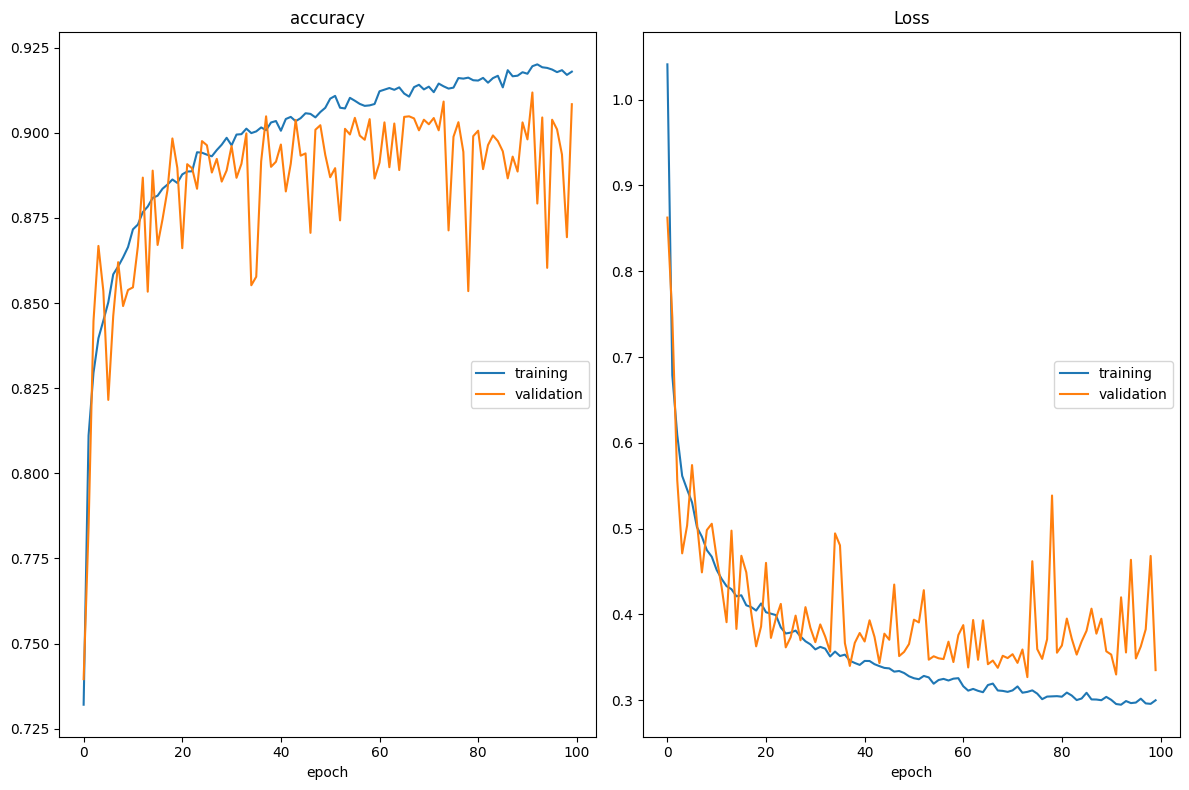

accuracy
	training         	 (min:    0.732, max:    0.920, cur:    0.918)
	validation       	 (min:    0.740, max:    0.912, cur:    0.908)
Loss
	training         	 (min:    0.295, max:    1.041, cur:    0.300)
	validation       	 (min:    0.327, max:    0.863, cur:    0.335)
657/657 [==============================] - 16s 24ms/step - loss: 0.3000 - accuracy: 0.9180 - val_loss: 0.3351 - val_accuracy: 0.9084


In [9]:
history = model.fit(X_train, y_train,
            batch_size=64,
            epochs=100,
            validation_split=0.3,
            callbacks=[PlotLossesKeras()],
            verbose=1)

# Get the model's performance on the test set

In [10]:
loss, accuracy = model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3648 - accuracy: 0.9027


In [11]:
print(f"Loss (sparse_categorical_crossentropy) = {loss}")
print(f"Accuracy = {accuracy}")

Loss (sparse_categorical_crossentropy) = 0.3647902309894562
Accuracy = 0.9027000069618225
